# Homework 2 - BME E4460 Deep Learning in Biomedical Engineering

Instructor’s Name: Dr. Andrew Laine (laine@columbia.edu) and Dr. Jia Guo (jg3400@columbia.edu)

Teaching Assistant (TA):  Hengda He (hh2699@columbia.edu)      Grader:  Xueqing Liu (xueqing.liu@columbia.edu)
      
This assignment comes with two sections.

--------------------------------------------------

- Section 1: Concepts and Theories (25')

1) True/False (15')

2) Multiple choice (10')

- Section 2: Programming (75' + Bonus 10')

1) Gredient Descent - a binary classification example using Adaptive linear neuron model (35')

2) MNIST CNN (40' + Bonus 10')

--------------------------------------------------

TA office hours:

- (Hengda He) Feb 17th, Monday, time 5:00-6:00 pm (place: Mudd BME Multipurpose Room (ET343))
- (Hengda He) Feb 24th, Monday, time 5:00-6:00 pm (place: Mudd BME Multipurpose Room (ET343))

- (Xueqing Liu) TBA
- (Xueqing Liu) TBA

--------------------------------------------------

Please remember to stop the VM instances after using (prevent from losing money)

Homework release date: Feb 14 2020

Homework due time: Feb 28 2020 10:00pm

Your name and UNI: 

## Section 1. Concepts and Theories (25')

### 1. True/False (15')

- a. Max pooling is usually applied right before an ReLU in a CNN layer.
- b. Convergence of gradient decent in convex problems is (mathematically) assured. 
- c. A sufficient (but not necessary) condition for running a gradient decent algorithm on a neural network is that each neuron’s transfer function be differentiable. 

### 2. Multiple choice (10')

Which of the following is true with respect to the training process of a deep net?

- a)	The training process utilizes gradients which measure the change at which the weights and biases change with respect to the cost.
- b)	 The cost is the difference between the net's predicted and actual outputs.
- c)	The training process utilizes a technique called back-propagation.
- d)	The objective of the training process is to make the cost as low as possible.
- e)	All of the above.


## Section 2. Programming (75' + Bonus 10')

### 1. Gredient Descent - a binary classification example using Adaptive linear neuron model (35')

Import packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Load Wisconsin Breast Cancer Dataset, and display last five lines

- Number of Instances: 699
- Number of Attributes: 10 plus the class attribute
<pre>
   Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
</pre>

O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

In [3]:
df = pd.read_csv('data/breast-cancer-wisconsin.data', header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


Extract labels (2 for benign, 4 for malignant) and convert into two integer class labels (-1 for benign, 1 for malignant)

In [4]:
# select 2(benign) and 4(malignant)
y = df.iloc[:, 10].values
y = np.where(y == 2, -1, 1)

Extract the first feature column (Clump Thickness) and the second feature column (Uniformity of Cell Size) of all the trainset and assign them to matrix X.

In [5]:
# extract Clump Thickness and Uniformity of Cell Size
X = df.iloc[:, [1, 2]].values
print(X.shape)
print(X)

(699, 2)
[[ 5  1]
 [ 5  4]
 [ 3  1]
 ...
 [ 5 10]
 [ 4  8]
 [ 4  8]]


Visualize data with scatterplot. Distribution of data samples along two feature axes (Clump Thickness and Uniformity of Cell Size).

There is some overlap between the distribution of Benign and Malignant, but we can still train a classifier (Red Dot: Benign; Blue Cross: Malignant)


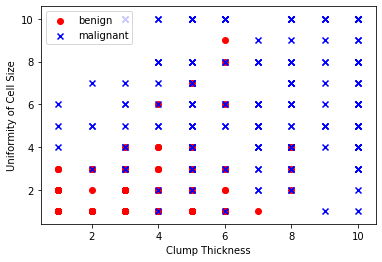

In [8]:
idx_1 = np.where(y == -1)
idx1 = np.where(y == 1)

plt.scatter(X[idx_1, 0], X[idx_1, 1],
            color='red', marker='o', label='benign')
plt.scatter(X[idx1, 0], X[idx1, 1],
            color='blue', marker='x', label='malignant')

plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.legend(loc='upper left')
print('There is some overlap between the distribution of Benign and Malignant, but we can still train a classifier (Red Dot: Benign; Blue Cross: Malignant)')
plt.show()


Given weight vector $w$, input samples $x$, true class label $y$ and linear activation function $\phi(z)=\phi(w^Tx)=w^Tx$

We use Sum of Squared Errors (SSE) as the objective function $J(w)$

\begin{equation*}
J(w)=\frac{1}{2}\sum_{i}(y^i-\phi(z^i))^2
\end{equation*}

(1) (20') Please implement a gradient descent algorithm to update the weights $w$:
- 1. $w = w + \Delta w$
- 2. $\Delta w = -\eta\nabla J(w)$
- 3. $\frac{\partial J}{\partial w_j}=-\sum_{i}(y^i-\phi(z^i))x_j^i$
- 4. $\Delta w_j=-\eta\frac{\partial J}{\partial w_j}=\eta\sum_{i}(y^i-\phi(z^i))x_j^i$

Please set your learning rate $\eta$ and iteration number (until converge) properly.

(2) (15') Please plot the objective function (SSE) $J(w)$ as a function of iterations.

### 2. MNIST CNN (40' + Bonus 10')
Please go through 
https://github.com/RnR-2018/BMEN4460-NB2-image_classification_on_MNIST_data

The notebook BMEN4460-NB2-image_classification_on_MNIST_data.ipynb walks you through the process of building a convolutional neural network (CNN) to classify the handwritten digits.

The notebook with visualization BMEN4460-NB2-image_classification_on_MNIST_data_with_visualization.ipynb intends to visualize how the convolutional kernels/filters evolve over the training process.


#### (1) (15') Please calculate the number of paprameters for each layers.

#### (2) (25') Please increase the output channel of the second convolutional layer from 20 to 40 and rerun the model.

#### (3) (Bonus 10pts) Please write down the last four digits of your UNI and apply your MNIST model to classify the four digits. 
- a. Write down any digit on a white paper with black pen.
- b. Take a picture of the digit. 
- c. Convert the picture as .png format. 
- d. Process the image with thresholding operation, s.t. the digit is white color (as 255) and the background is black color (as 0).
- e. Convert the binarized image into 28 x 28 image size.
- f. Use this 28 x 28 image you just generated as the testing image for your MNIST model and report its predicted label (i.e., the 10 x 1 probobility array).  
- g. Please comment on the prediction, whether or not you get the correct label and why.